In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function

import datetime
import pandas as pd
import numpy as np
from dateutil import parser as dtparser

from utils.datafetch import *
from utils.vectorized_funs import *
from utils.datapipe import *
from utils.kerasutil import *
from utils import scenarioc
from FintechCapstone import FinCapstone

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pd.options.display.max_rows = 200


Using TensorFlow backend.


In [3]:
%matplotlib inline

plt.style.use('seaborn-whitegrid')
date_from = '2009-01-01'
date_to = '2017-03-01'
timespan = {
    "short_term": [1, 5]
    ,"medium_term": [40]
    ,"long_term": [90]
}

#trial = FinCapstone(ticker_list=["GLW","HIMX","GLUU"], scenario="baseline",ticker_list_samplesize=4, timespan=timespan, date_from=date_from, reset_status=False)
#trial = FinCapstone(ticker_list=["ZHNE","BSFT","AERO","MATR","ITMSF","FIT","TIPT","OLBK","QADA","ATTU","LGF","STX","TPCS","GSAT","ZNGA","GLW","HIMX","YHOO", "NWSA","JAKK","GLUU","AMZN", "AAPL", "EBAY", "GOOG", "NFLX", "DIS", "EA", "TWTR", "FB", "TTWO", "PXLW", "UBI"], scenario="scenarioa", ticker_list_samplesize=4, timespan=timespan, date_from=date_from, reset_status=False)
trial = FinCapstone(model_name="FullScenarioC", scenario="scenarioc", ticker_list_samplesize=200, timespan=timespan, date_from=date_from, reset_status=False)

#trial.run_initial_dataload()
#trial.feature_engineering()
#trial.train(2, ticker="GLUU")
#trial.train(train_next=2)



nasdaq100 has 107 tickers.


Final dataset has 107 records
(OK) Final dataset has 107 distinct tickers


In [4]:
trial.load_status_files()
trial.trialconfig_df

,value
property,
modeltrainmarket_status,INCOMPLETE
scenario,scenarioc
date_to,2017-05-12
featureengineer_status,COMPLETE
modeltrain_status,INCOMPLETE
train_from,2010-01-01 00:00:00
train_until,2015-12-31 00:00:00
test_from,2016-01-01 00:00:00
modeleval_status,INCOMPLETE


In [5]:
trial.load_status_files()
trial.fetchstatus_df

,status,start,end,msg
ticker,,,,
ATVI,OK,2017-05-12 23:17:49.093084,2017-05-12 23:17:51.363581,NaN
ADBE,OK,2017-05-12 23:17:51.363755,2017-05-12 23:17:53.709674,NaN
AKAM,OK,2017-05-12 23:17:53.709812,2017-05-12 23:17:55.635093,NaN
ALXN,OK,2017-05-12 23:17:55.635238,2017-05-12 23:17:57.712481,NaN
GOOG,OK,2017-05-12 23:17:57.712628,2017-05-12 23:17:59.633554,NaN
GOOGL,OK,2017-05-12 23:17:59.633688,2017-05-12 23:18:01.504546,NaN
AMZN,OK,2017-05-12 23:18:01.504734,2017-05-12 23:18:03.544335,NaN
AAL,OK,2017-05-12 23:18:03.544499,2017-05-12 23:18:05.302120,NaN
AMGN,OK,2017-05-12 23:18:05.302293,2017-05-12 23:18:07.634591,NaN


In [6]:
trial.load_status_files()
trial.featureengineer_status_df

,status,start,end,msg
ticker,,,,
ATVI,OK,2017-05-12 23:22:02.579546,2017-05-12 23:22:02.617338,NaN
ADBE,OK,2017-05-12 23:22:02.617905,2017-05-12 23:22:02.658928,NaN
AKAM,OK,2017-05-12 23:22:02.659255,2017-05-12 23:22:02.696935,NaN
ALXN,OK,2017-05-12 23:22:02.697248,2017-05-12 23:22:02.735797,NaN
GOOG,OK,2017-05-12 23:22:02.736106,2017-05-12 23:22:02.773033,NaN
GOOGL,OK,2017-05-12 23:22:02.773343,2017-05-12 23:22:02.811744,NaN
AMZN,OK,2017-05-12 23:22:02.812057,2017-05-12 23:22:02.850738,NaN
AAL,OK,2017-05-12 23:22:02.851094,2017-05-12 23:22:02.885992,NaN
AMGN,OK,2017-05-12 23:22:02.886305,2017-05-12 23:22:02.927805,NaN


In [18]:
trial.load_status_files()
trial.encode_status_df

,,status,start,end,msg
ticker,date,,,,


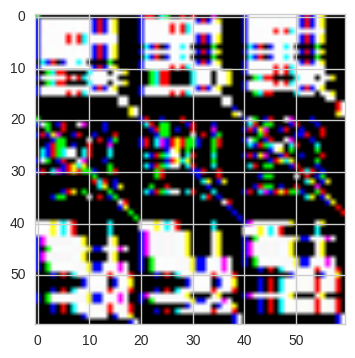

In [31]:
plt.imshow(scenarioc.load_scenarioc_encodings("TXN",trial.model_name,"2015-07-16"))

In [19]:
trial.load_status_files()
trial.encode_status_df_0

status                       start  \
ticker date                                            
ATVI   2009-01-02     OK  2017-05-12 23:26:36.546625   
       2009-01-05     OK  2017-05-12 23:26:36.568827   
       2009-01-06     OK  2017-05-12 23:26:36.573307   
       2009-01-07     OK  2017-05-12 23:26:36.577687   
       2009-01-08     OK  2017-05-12 23:26:36.582120   
       2009-01-09     OK  2017-05-12 23:26:36.586506   
       2009-01-12     OK  2017-05-12 23:26:36.597159   
       2009-01-13     OK  2017-05-12 23:26:36.601557   
       2009-01-14     OK  2017-05-12 23:26:36.606103   
       2009-01-15     OK  2017-05-12 23:26:36.610537   
       2009-01-16     OK  2017-05-12 23:26:36.614955   
       2009-01-20     OK  2017-05-12 23:26:36.628863   
       2009-01-21     OK  2017-05-12 23:26:36.633393   
       2009-01-22     OK  2017-05-12 23:26:36.637776   
       2009-01-23     OK  2017-05-12 23:26:36.642051   
       2009-01-26     OK  2017-05-12 23:26:36.653172   
       2009-01-27     OK  2017-05-12 23:26:36.657404   
       2009-01-28     OK  2017-05-12 23:26:36.661657   
       2009-01-29     OK  2017-05-12 23:26:36.665926   
       2009-01-30     OK  2017-05-12 23:26:36.670196   
       2009-02-02     OK  2017-05-12 23:26:36.680706   
       2009-02-03     OK  2017-05-12 23:26:36.685030   
       2009-02-04     OK  2017-05-12 23:26:36.689318   
       2009-02-05     OK  2017-05-12 23:26:36.693671   
       2009-02-06     OK  2017-05-12 23:26:36.697980   
       2009-02-09     OK  2017-05-12 23:26:36.708501   
       2009-02-10     OK  2017-05-12 23:26:36.712852   
       2009-02-11     OK  2017-05-12 23:26:36.717243   
       2009-02-12     OK  2017-05-12 23:26:36.721691   
       2009-02-13     OK  2017-05-12 23:26:36.726063   
       2009-02-17     OK  2017-05-12 23:26:36.740712   
       2009-02-18     OK  2017-05-12 23:26:36.745259   
       2009-02-19     OK  2017-05-12 23:26:36.749895   
       2009-02-20     OK  2017-05-12 23:26:36.754375   
       2009-02-23     OK  2017-05-12 23:26:36.765195   
       2009-02-24     OK  2017-05-12 23:26:36.769614   
       2009-02-25     OK  2017-05-12 23:26:36.773975   
       2009-02-26     OK  2017-05-12 23:26:36.778300   
       2009-02-27     OK  2017-05-12 23:26:36.782649   
       2009-03-02     OK  2017-05-12 23:26:36.793634   
       2009-03-03     OK  2017-05-12 23:26:36.798299   
       2009-03-04     OK  2017-05-12 23:26:36.802971   
       2009-03-05     OK  2017-05-12 23:26:36.807455   
       2009-03-06     OK  2017-05-12 23:26:36.811849   
       2009-03-09     OK  2017-05-12 23:26:36.822395   
       2009-03-10     OK  2017-05-12 23:26:36.826782   
       2009-03-11     OK  2017-05-12 23:26:36.831216   
       2009-03-12     OK  2017-05-12 23:26:36.836296   
       2009-03-13     OK  2017-05-12 23:26:36.840754   
       2009-03-16     OK  2017-05-12 23:26:36.851906   
       2009-03-17     OK  2017-05-12 23:26:36.856453   
       2009-03-18     OK  2017-05-12 23:26:36.860915   
       2009-03-19     OK  2017-05-12 23:26:36.865493   
       2009-03-20     OK  2017-05-12 23:26:36.870004   
       2009-03-23     OK  2017-05-12 23:26:36.880924   
       2009-03-24     OK  2017-05-12 23:26:36.885583   
       2009-03-25     OK  2017-05-12 23:26:36.890054   
       2009-03-26     OK  2017-05-12 23:26:36.894558   
       2009-03-27     OK  2017-05-12 23:26:36.899101   
       2009-03-30     OK  2017-05-12 23:26:36.909952   
       2009-03-31     OK  2017-05-12 23:26:36.914493   
       2009-04-01     OK  2017-05-12 23:26:38.253010   
       2009-04-02     OK  2017-05-12 23:26:39.529226   
       2009-04-03     OK  2017-05-12 23:26:40.843074   
       2009-04-06     OK  2017-05-12 23:26:42.204718   
       2009-04-07     OK  2017-05-12 23:26:43.831789   
       2009-04-08     OK  2017-05-12 23:26:46.018777   
       2009-04-09     OK  2017-05-12 23:26:48.509421   
       2009-04-13     OK  2017-05-12 23:26:50.826124   
       2009-04-14     OK  2017-05-12 23:26

In [20]:
trial.load_status_files()
trial.encode_status_df_1

status                       start  \
ticker date                                            
BIIB   2011-05-24     OK  2017-05-12 23:26:37.792174   
       2011-05-25     OK  2017-05-12 23:26:39.069847   
       2011-05-26     OK  2017-05-12 23:26:40.363785   
       2011-05-27     OK  2017-05-12 23:26:41.692544   
       2011-05-31     OK  2017-05-12 23:26:43.002946   
       2011-06-01     OK  2017-05-12 23:26:44.312784   
       2011-06-02     OK  2017-05-12 23:26:45.621455   
       2011-06-03     OK  2017-05-12 23:26:48.105174   
       2011-06-06     OK  2017-05-12 23:26:50.284082   
       2011-06-07     OK  2017-05-12 23:26:51.665297   
       2011-06-08     OK  2017-05-12 23:26:53.301972   
       2011-06-09     OK  2017-05-12 23:26:54.651615   
       2011-06-10     OK  2017-05-12 23:26:57.161654   
       2011-06-13     OK  2017-05-12 23:26:58.874457   
       2011-06-14     OK  2017-05-12 23:27:00.193481   
       2011-06-15     OK  2017-05-12 23:27:01.500483   
       2011-06-16     OK  2017-05-12 23:27:02.844909   
       2011-06-17     OK  2017-05-12 23:27:04.654859   
       2011-06-20     OK  2017-05-12 23:27:05.968990   
       2011-06-21     OK  2017-05-12 23:27:07.534936   
       2011-06-22     OK  2017-05-12 23:27:09.695378   
       2011-06-23     OK  2017-05-12 23:27:12.100318   
       2011-06-24     OK  2017-05-12 23:27:13.639899   
       2011-06-27     OK  2017-05-12 23:27:16.131563   
       2011-06-28     OK  2017-05-12 23:27:17.995942   
       2011-06-29     OK  2017-05-12 23:27:20.332077   
       2011-06-30     OK  2017-05-12 23:27:22.893825   
       2011-07-01     OK  2017-05-12 23:27:24.576543   
       2011-07-05     OK  2017-05-12 23:27:25.985681   
       2011-07-06     OK  2017-05-12 23:27:27.315058   
       2011-07-07     OK  2017-05-12 23:27:28.641250   
       2011-07-08     OK  2017-05-12 23:27:29.970033   
       2011-07-11     OK  2017-05-12 23:27:32.247892   
       2011-07-12     OK  2017-05-12 23:27:34.876926   
       2011-07-13     OK  2017-05-12 23:27:37.508935   
       2011-07-14     OK  2017-05-12 23:27:40.067381   
       2011-07-15     OK  2017-05-12 23:27:42.606918   
       2011-07-18     OK  2017-05-12 23:27:45.167640   
       2011-07-19     OK  2017-05-12 23:27:47.754290   
       2011-07-20     OK  2017-05-12 23:27:50.296903   
       2011-07-21     OK  2017-05-12 23:27:52.859833   
       2011-07-22     OK  2017-05-12 23:27:55.408842   
       2011-07-25     OK  2017-05-12 23:27:57.978966   
       2011-07-26     OK  2017-05-12 23:27:59.821459   
       2011-07-27     OK  2017-05-12 23:28:01.171032   
       2011-07-28     OK  2017-05-12 23:28:03.697401   
       2011-07-29     OK  2017-05-12 23:28:06.235651   
       2011-08-01     OK  2017-05-12 23:28:08.817137   
       2011-08-02     OK  2017-05-12 23:28:10.386713   
       2011-08-03     OK  2017-05-12 23:28:11.712588   
       2011-08-04     OK  2017-05-12 23:28:13.098264   
       2011-08-05     OK  2017-05-12 23:28:14.495328   
       2011-08-08     OK  2017-05-12 23:28:16.856465   
       2011-08-09     OK  2017-05-12 23:28:18.179442   
       2011-08-10     OK  2017-05-12 23:28:19.890275   
       2011-08-11     OK  2017-05-12 23:28:21.264045   
       2011-08-12     OK  2017-05-12 23:28:22.591351   
       2011-08-15     OK  2017-05-12 23:28:23.939400   
       2011-08-16     OK  2017-05-12 23:28:25.272188   
       2011-08-17     OK  2017-05-12 23:28:26.594935   
       2011-08-18     OK  2017-05-12 23:28:27.926681   
       2011-08-19     OK  2017-05-12 23:28:29.242845   
       2011-08-22     OK  2017-05-12 23:28:31.493017   
       2011-08-23     OK  2017-05-12 23:28:34.034545   
       2011-08-24     OK  2017-05-12 23:28:36.576819   
       2011-08-25     OK  2017-05-12 23:28:39.109972   
       2011-08-26     OK  2017-05-12 23:28:41.502185   
       2011-08-29     OK  2017-05-12 23:28:42.819125   
       2011-08-30     OK  2017-05-12 23:28:44.144019   
       2011-08-31     OK  2017-05-12 23:28

In [21]:
trial.load_status_files()
trial.encode_status_df_2

status                       start  \
ticker date                                            
CTRP   2013-10-14     OK  2017-05-12 23:26:38.646263   
       2013-10-15     OK  2017-05-12 23:26:39.943140   
       2013-10-16     OK  2017-05-12 23:26:41.281014   
       2013-10-17     OK  2017-05-12 23:26:42.591627   
       2013-10-18     OK  2017-05-12 23:26:43.922160   
       2013-10-21     OK  2017-05-12 23:26:45.360823   
       2013-10-22     OK  2017-05-12 23:26:47.091271   
       2013-10-23     OK  2017-05-12 23:26:48.688547   
       2013-10-24     OK  2017-05-12 23:26:50.983375   
       2013-10-25     OK  2017-05-12 23:26:52.820085   
       2013-10-28     OK  2017-05-12 23:26:54.157788   
       2013-10-29     OK  2017-05-12 23:26:55.488207   
       2013-10-30     OK  2017-05-12 23:26:56.820380   
       2013-10-31     OK  2017-05-12 23:26:58.755047   
       2013-11-01     OK  2017-05-12 23:27:01.324101   
       2013-11-04     OK  2017-05-12 23:27:03.423762   
       2013-11-05     OK  2017-05-12 23:27:05.610227   
       2013-11-06     OK  2017-05-12 23:27:08.177847   
       2013-11-07     OK  2017-05-12 23:27:10.253620   
       2013-11-08     OK  2017-05-12 23:27:11.916949   
       2013-11-11     OK  2017-05-12 23:27:14.197489   
       2013-11-12     OK  2017-05-12 23:27:15.836952   
       2013-11-13     OK  2017-05-12 23:27:17.177036   
       2013-11-14     OK  2017-05-12 23:27:19.063313   
       2013-11-15     OK  2017-05-12 23:27:21.622340   
       2013-11-18     OK  2017-05-12 23:27:23.527425   
       2013-11-19     OK  2017-05-12 23:27:25.784150   
       2013-11-20     OK  2017-05-12 23:27:28.354474   
       2013-11-21     OK  2017-05-12 23:27:30.922512   
       2013-11-22     OK  2017-05-12 23:27:33.481177   
       2013-11-25     OK  2017-05-12 23:27:35.813050   
       2013-11-26     OK  2017-05-12 23:27:37.965455   
       2013-11-27     OK  2017-05-12 23:27:39.610144   
       2013-11-29     OK  2017-05-12 23:27:42.193887   
       2013-12-02     OK  2017-05-12 23:27:44.452106   
       2013-12-03     OK  2017-05-12 23:27:46.992570   
       2013-12-04     OK  2017-05-12 23:27:49.556535   
       2013-12-05     OK  2017-05-12 23:27:52.131684   
       2013-12-06     OK  2017-05-12 23:27:54.713795   
       2013-12-09     OK  2017-05-12 23:27:57.327017   
       2013-12-10     OK  2017-05-12 23:27:59.942247   
       2013-12-11     OK  2017-05-12 23:28:02.527815   
       2013-12-12     OK  2017-05-12 23:28:05.007334   
       2013-12-13     OK  2017-05-12 23:28:07.037366   
       2013-12-16     OK  2017-05-12 23:28:09.617688   
       2013-12-17     OK  2017-05-12 23:28:12.186733   
       2013-12-18     OK  2017-05-12 23:28:14.744008   
       2013-12-19     OK  2017-05-12 23:28:17.314496   
       2013-12-20     OK  2017-05-12 23:28:19.919290   
       2013-12-23     OK  2017-05-12 23:28:22.492171   
       2013-12-24     OK  2017-05-12 23:28:25.081966   
       2013-12-26     OK  2017-05-12 23:28:27.651558   
       2013-12-27     OK  2017-05-12 23:28:30.236861   
       2013-12-30     OK  2017-05-12 23:28:32.819412   
       2013-12-31     OK  2017-05-12 23:28:35.389714   
       2014-01-02     OK  2017-05-12 23:28:37.970874   
       2014-01-03     OK  2017-05-12 23:28:40.558872   
       2014-01-06     OK  2017-05-12 23:28:43.163604   
       2014-01-07     OK  2017-05-12 23:28:45.747007   
       2014-01-08     OK  2017-05-12 23:28:48.325962   
       2014-01-09     OK  2017-05-12 23:28:50.907440   
       2014-01-10     OK  2017-05-12 23:28:53.511588   
       2014-01-13     OK  2017-05-12 23:28:56.119588   
       2014-01-14     OK  2017-05-12 23:28:58.699505   
       2014-01-15     OK  2017-05-12 23:29:01.269905   
       2014-01-16     OK  2017-05-12 23:29:03.867117   
       2014-01-17     OK  2017-05-12 23:29:05.635255   
       2014-01-21     OK  2017-05-12 23:29:08.207842   
       2014-01-22     OK  2017-05-12 23:29:10.778996   
       2014-01-23     OK  2017-05-12 23:29

In [22]:
trial.load_status_files()
trial.encode_status_df_3

status                       start  \
ticker date                                            
HSIC   2016-03-04     OK  2017-05-12 23:26:42.647948   
       2016-03-07     OK  2017-05-12 23:26:43.971691   
       2016-03-08     OK  2017-05-12 23:26:45.302227   
       2016-03-09     OK  2017-05-12 23:26:47.562837   
       2016-03-10     OK  2017-05-12 23:26:50.148540   
       2016-03-11     OK  2017-05-12 23:26:52.371992   
       2016-03-14     OK  2017-05-12 23:26:55.007696   
       2016-03-15     OK  2017-05-12 23:26:57.475433   
       2016-03-16     OK  2017-05-12 23:27:00.022254   
       2016-03-17     OK  2017-05-12 23:27:02.616025   
       2016-03-18     OK  2017-05-12 23:27:05.177709   
       2016-03-21     OK  2017-05-12 23:27:07.787956   
       2016-03-22     OK  2017-05-12 23:27:09.178511   
       2016-03-23     OK  2017-05-12 23:27:10.705497   
       2016-03-24     OK  2017-05-12 23:27:13.132609   
       2016-03-28     OK  2017-05-12 23:27:15.297534   
       2016-03-29     OK  2017-05-12 23:27:16.613406   
       2016-03-30     OK  2017-05-12 23:27:17.937139   
       2016-03-31     OK  2017-05-12 23:27:20.290390   
       2016-04-01     OK  2017-05-12 23:27:22.857802   
       2016-04-04     OK  2017-05-12 23:27:24.988699   
       2016-04-05     OK  2017-05-12 23:27:27.537084   
       2016-04-06     OK  2017-05-12 23:27:30.099192   
       2016-04-07     OK  2017-05-12 23:27:32.661334   
       2016-04-08     OK  2017-05-12 23:27:35.138239   
       2016-04-11     OK  2017-05-12 23:27:37.511137   
       2016-04-12     OK  2017-05-12 23:27:39.690465   
       2016-04-13     OK  2017-05-12 23:27:41.038896   
       2016-04-14     OK  2017-05-12 23:27:42.351193   
       2016-04-15     OK  2017-05-12 23:27:43.657196   
       2016-04-18     OK  2017-05-12 23:27:45.022891   
       2016-04-19     OK  2017-05-12 23:27:46.873518   
       2016-04-20     OK  2017-05-12 23:27:49.449151   
       2016-04-21     OK  2017-05-12 23:27:52.035954   
       2016-04-22     OK  2017-05-12 23:27:54.617251   
       2016-04-25     OK  2017-05-12 23:27:57.206468   
       2016-04-26     OK  2017-05-12 23:27:59.300046   
       2016-04-27     OK  2017-05-12 23:28:01.888493   
       2016-04-28     OK  2017-05-12 23:28:03.924396   
       2016-04-29     OK  2017-05-12 23:28:05.551833   
       2016-05-02     OK  2017-05-12 23:28:07.895933   
       2016-05-03     OK  2017-05-12 23:28:10.452166   
       2016-05-04     OK  2017-05-12 23:28:13.042316   
       2016-05-05     OK  2017-05-12 23:28:15.639292   
       2016-05-06     OK  2017-05-12 23:28:18.227166   
       2016-05-09     OK  2017-05-12 23:28:20.847220   
       2016-05-10     OK  2017-05-12 23:28:23.445837   
       2016-05-11     OK  2017-05-12 23:28:26.070816   
       2016-05-12     OK  2017-05-12 23:28:28.668521   
       2016-05-13     OK  2017-05-12 23:28:31.261794   
       2016-05-16     OK  2017-05-12 23:28:33.881263   
       2016-05-17     OK  2017-05-12 23:28:36.482044   
       2016-05-18     OK  2017-05-12 23:28:38.560390   
       2016-05-19     OK  2017-05-12 23:28:41.103753   
       2016-05-20     OK  2017-05-12 23:28:43.679640   
       2016-05-23     OK  2017-05-12 23:28:46.241940   
       2016-05-24     OK  2017-05-12 23:28:48.804836   
       2016-05-25     OK  2017-05-12 23:28:51.399591   
       2016-05-26     OK  2017-05-12 23:28:54.002302   
       2016-05-27     OK  2017-05-12 23:28:56.565452   
       2016-05-31     OK  2017-05-12 23:28:59.112392   
       2016-06-01     OK  2017-05-12 23:29:01.650520   
       2016-06-02     OK  2017-05-12 23:29:04.228984   
       2016-06-03     OK  2017-05-12 23:29:06.765462   
       2016-06-06     OK  2017-05-12 23:29:09.340396   
       2016-06-07     OK  2017-05-12 23:29:11.886605   
       2016-06-08     OK  2017-05-12 23:29:14.433897   
       2016-06-09     OK  2017-05-12 23:29:17.046427   
       2016-06-10     OK  2017-05-12 23:29:19.653056   
       2016-06-13     OK  2017-05-12 23:29

In [23]:
trial.load_status_files()
trial.encode_status_df_4

status                       start  \
ticker date                                            
LVNTA  2012-08-10     OK  2017-05-12 23:26:49.452421   
       2012-08-13     OK  2017-05-12 23:26:49.464382   
       2012-08-14     OK  2017-05-12 23:26:49.468584   
       2012-08-15     OK  2017-05-12 23:26:49.472798   
       2012-08-16     OK  2017-05-12 23:26:49.476982   
       2012-08-17     OK  2017-05-12 23:26:49.481163   
       2012-08-20     OK  2017-05-12 23:26:49.490953   
       2012-08-21     OK  2017-05-12 23:26:49.495157   
       2012-08-22     OK  2017-05-12 23:26:49.499349   
       2012-08-23     OK  2017-05-12 23:26:49.503503   
       2012-08-24     OK  2017-05-12 23:26:49.507671   
       2012-08-27     OK  2017-05-12 23:26:49.517336   
       2012-08-28     OK  2017-05-12 23:26:49.521491   
       2012-08-29     OK  2017-05-12 23:26:49.525654   
       2012-08-30     OK  2017-05-12 23:26:49.529799   
       2012-08-31     OK  2017-05-12 23:26:49.533945   
       2012-09-04     OK  2017-05-12 23:26:49.547217   
       2012-09-05     OK  2017-05-12 23:26:49.551448   
       2012-09-06     OK  2017-05-12 23:26:49.555660   
       2012-09-07     OK  2017-05-12 23:26:49.559900   
       2012-09-10     OK  2017-05-12 23:26:49.569825   
       2012-09-11     OK  2017-05-12 23:26:49.574066   
       2012-09-12     OK  2017-05-12 23:26:49.578299   
       2012-09-13     OK  2017-05-12 23:26:49.582544   
       2012-09-14     OK  2017-05-12 23:26:49.586789   
       2012-09-17     OK  2017-05-12 23:26:49.596810   
       2012-09-18     OK  2017-05-12 23:26:49.601080   
       2012-09-19     OK  2017-05-12 23:26:49.605283   
       2012-09-20     OK  2017-05-12 23:26:49.609509   
       2012-09-21     OK  2017-05-12 23:26:49.613724   
       2012-09-24     OK  2017-05-12 23:26:49.623576   
       2012-09-25     OK  2017-05-12 23:26:49.627821   
       2012-09-26     OK  2017-05-12 23:26:49.632005   
       2012-09-27     OK  2017-05-12 23:26:49.636214   
       2012-09-28     OK  2017-05-12 23:26:49.640450   
       2012-10-01     OK  2017-05-12 23:26:49.650242   
       2012-10-02     OK  2017-05-12 23:26:49.654447   
       2012-10-03     OK  2017-05-12 23:26:49.658627   
       2012-10-04     OK  2017-05-12 23:26:49.662825   
       2012-10-05     OK  2017-05-12 23:26:49.666992   
       2012-10-08     OK  2017-05-12 23:26:49.676695   
       2012-10-09     OK  2017-05-12 23:26:49.680867   
       2012-10-10     OK  2017-05-12 23:26:49.685035   
       2012-10-11     OK  2017-05-12 23:26:49.689187   
       2012-10-12     OK  2017-05-12 23:26:49.693370   
       2012-10-15     OK  2017-05-12 23:26:49.703058   
       2012-10-16     OK  2017-05-12 23:26:49.707224   
       2012-10-17     OK  2017-05-12 23:26:49.711398   
       2012-10-18     OK  2017-05-12 23:26:49.716397   
       2012-10-19     OK  2017-05-12 23:26:49.720674   
       2012-10-22     OK  2017-05-12 23:26:49.730699   
       2012-10-23     OK  2017-05-12 23:26:49.734947   
       2012-10-24     OK  2017-05-12 23:26:49.739206   
       2012-10-25     OK  2017-05-12 23:26:49.743459   
       2012-10-26     OK  2017-05-12 23:26:49.747735   
       2012-10-31     OK  2017-05-12 23:26:49.763536   
       2012-11-01     OK  2017-05-12 23:26:49.767794   
       2012-11-02     OK  2017-05-12 23:26:49.772084   
       2012-11-05     OK  2017-05-12 23:26:49.782139   
       2012-11-06     OK  2017-05-12 23:26:49.786434   
       2012-11-07     OK  2017-05-12 23:26:49.790713   
       2012-11-08     OK  2017-05-12 23:26:51.839311   
       2012-11-09     OK  2017-05-12 23:26:54.332795   
       2012-11-12     OK  2017-05-12 23:26:56.904771   
       2012-11-13     OK  2017-05-12 23:26:59.279957   
       2012-11-14     OK  2017-05-12 23:27:01.822705   
       2012-11-15     OK  2017-05-12 23:27:04.406944   
       2012-11-16     OK  2017-05-12 23:27:06.668071   
       2012-11-19     OK  2017-05-12 23:27:09.223777   
       2012-11-20     OK  2017-05-12 23:27

In [24]:
trial.load_status_files()
trial.encode_status_df_5

status                       start  \
ticker date                                            
ORLY   2012-08-06     OK  2017-05-12 23:26:48.062797   
       2012-08-07     OK  2017-05-12 23:26:50.167357   
       2012-08-08     OK  2017-05-12 23:26:51.980379   
       2012-08-09     OK  2017-05-12 23:26:54.555137   
       2012-08-10     OK  2017-05-12 23:26:55.944622   
       2012-08-13     OK  2017-05-12 23:26:57.321447   
       2012-08-14     OK  2017-05-12 23:26:58.668349   
       2012-08-15     OK  2017-05-12 23:27:00.072046   
       2012-08-16     OK  2017-05-12 23:27:01.421257   
       2012-08-17     OK  2017-05-12 23:27:03.411194   
       2012-08-20     OK  2017-05-12 23:27:05.996052   
       2012-08-21     OK  2017-05-12 23:27:08.562216   
       2012-08-22     OK  2017-05-12 23:27:10.730139   
       2012-08-23     OK  2017-05-12 23:27:13.180494   
       2012-08-24     OK  2017-05-12 23:27:15.036060   
       2012-08-27     OK  2017-05-12 23:27:17.001344   
       2012-08-28     OK  2017-05-12 23:27:19.276635   
       2012-08-29     OK  2017-05-12 23:27:20.608491   
       2012-08-30     OK  2017-05-12 23:27:22.111384   
       2012-08-31     OK  2017-05-12 23:27:24.745731   
       2012-09-04     OK  2017-05-12 23:27:27.375564   
       2012-09-05     OK  2017-05-12 23:27:29.982527   
       2012-09-06     OK  2017-05-12 23:27:32.617603   
       2012-09-07     OK  2017-05-12 23:27:35.285414   
       2012-09-10     OK  2017-05-12 23:27:37.483281   
       2012-09-11     OK  2017-05-12 23:27:39.938800   
       2012-09-12     OK  2017-05-12 23:27:42.500544   
       2012-09-13     OK  2017-05-12 23:27:45.078959   
       2012-09-14     OK  2017-05-12 23:27:47.180946   
       2012-09-17     OK  2017-05-12 23:27:48.532800   
       2012-09-18     OK  2017-05-12 23:27:49.889560   
       2012-09-19     OK  2017-05-12 23:27:51.229284   
       2012-09-20     OK  2017-05-12 23:27:52.576139   
       2012-09-21     OK  2017-05-12 23:27:53.931837   
       2012-09-24     OK  2017-05-12 23:27:55.269253   
       2012-09-25     OK  2017-05-12 23:27:56.644511   
       2012-09-26     OK  2017-05-12 23:27:58.979201   
       2012-09-27     OK  2017-05-12 23:28:01.516371   
       2012-09-28     OK  2017-05-12 23:28:03.547468   
       2012-10-01     OK  2017-05-12 23:28:05.638960   
       2012-10-02     OK  2017-05-12 23:28:08.283524   
       2012-10-03     OK  2017-05-12 23:28:10.912084   
       2012-10-04     OK  2017-05-12 23:28:13.537771   
       2012-10-05     OK  2017-05-12 23:28:15.280185   
       2012-10-08     OK  2017-05-12 23:28:17.835758   
       2012-10-09     OK  2017-05-12 23:28:20.428583   
       2012-10-10     OK  2017-05-12 23:28:22.991363   
       2012-10-11     OK  2017-05-12 23:28:25.572080   
       2012-10-12     OK  2017-05-12 23:28:28.132578   
       2012-10-15     OK  2017-05-12 23:28:30.745588   
       2012-10-16     OK  2017-05-12 23:28:33.308138   
       2012-10-17     OK  2017-05-12 23:28:35.878251   
       2012-10-18     OK  2017-05-12 23:28:37.281684   
       2012-10-19     OK  2017-05-12 23:28:39.849176   
       2012-10-22     OK  2017-05-12 23:28:42.457776   
       2012-10-23     OK  2017-05-12 23:28:45.025825   
       2012-10-24     OK  2017-05-12 23:28:47.604655   
       2012-10-25     OK  2017-05-12 23:28:50.177758   
       2012-10-26     OK  2017-05-12 23:28:52.772843   
       2012-10-31     OK  2017-05-12 23:28:55.370665   
       2012-11-01     OK  2017-05-12 23:28:57.937779   
       2012-11-02     OK  2017-05-12 23:29:00.505505   
       2012-11-05     OK  2017-05-12 23:29:03.115842   
       2012-11-06     OK  2017-05-12 23:29:05.703676   
       2012-11-07     OK  2017-05-12 23:29:08.307593   
       2012-11-08     OK  2017-05-12 23:29:10.900132   
       2012-11-09     OK  2017-05-12 23:29:13.502117   
       2012-11-12     OK  2017-05-12 23:29:15.664901   
       2012-11-13     OK  2017-05-12 23:29:17.017202   
       2012-11-14     OK  2017-05-12 23:29

In [30]:
trial.load_status_files()
trial.encode_status_df_6

status                       start  \
ticker date                                            
TXN    2014-12-26     OK  2017-05-12 23:28:01.359903   
       2014-12-29     OK  2017-05-12 23:28:03.898337   
       2014-12-30     OK  2017-05-12 23:28:06.453558   
       2014-12-31     OK  2017-05-12 23:28:08.826580   
       2015-01-02     OK  2017-05-12 23:28:10.926866   
       2015-01-05     OK  2017-05-12 23:28:13.467846   
       2015-01-06     OK  2017-05-12 23:28:15.666258   
       2015-01-07     OK  2017-05-12 23:28:17.373208   
       2015-01-08     OK  2017-05-12 23:28:19.919395   
       2015-01-09     OK  2017-05-12 23:28:22.460392   
       2015-01-12     OK  2017-05-12 23:28:25.012751   
       2015-01-13     OK  2017-05-12 23:28:27.545973   
       2015-01-14     OK  2017-05-12 23:28:30.103219   
       2015-01-15     OK  2017-05-12 23:28:32.672664   
       2015-01-16     OK  2017-05-12 23:28:34.774552   
       2015-01-20     OK  2017-05-12 23:28:36.206018   
       2015-01-21     OK  2017-05-12 23:28:38.125800   
       2015-01-22     OK  2017-05-12 23:28:40.675604   
       2015-01-23     OK  2017-05-12 23:28:43.297778   
       2015-01-26     OK  2017-05-12 23:28:45.881817   
       2015-01-27     OK  2017-05-12 23:28:48.444288   
       2015-01-28     OK  2017-05-12 23:28:51.031429   
       2015-01-29     OK  2017-05-12 23:28:53.642916   
       2015-01-30     OK  2017-05-12 23:28:56.236349   
       2015-02-02     OK  2017-05-12 23:28:58.787709   
       2015-02-03     OK  2017-05-12 23:29:01.325076   
       2015-02-04     OK  2017-05-12 23:29:03.913747   
       2015-02-05     OK  2017-05-12 23:29:06.464540   
       2015-02-06     OK  2017-05-12 23:29:09.035431   
       2015-02-09     OK  2017-05-12 23:29:11.620575   
       2015-02-10     OK  2017-05-12 23:29:14.190195   
       2015-02-11     OK  2017-05-12 23:29:16.733455   
       2015-02-12     OK  2017-05-12 23:29:19.314501   
       2015-02-13     OK  2017-05-12 23:29:21.889107   
       2015-02-17     OK  2017-05-12 23:29:24.521757   
       2015-02-18     OK  2017-05-12 23:29:27.038809   
       2015-02-19     OK  2017-05-12 23:29:29.594981   
       2015-02-20     OK  2017-05-12 23:29:32.177319   
       2015-02-23     OK  2017-05-12 23:29:34.759477   
       2015-02-24     OK  2017-05-12 23:29:37.336485   
       2015-02-25     OK  2017-05-12 23:29:39.910872   
       2015-02-26     OK  2017-05-12 23:29:42.518114   
       2015-02-27     OK  2017-05-12 23:29:45.080400   
       2015-03-02     OK  2017-05-12 23:29:47.687551   
       2015-03-03     OK  2017-05-12 23:29:49.185236   
       2015-03-04     OK  2017-05-12 23:29:51.355660   
       2015-03-05     OK  2017-05-12 23:29:52.680133   
       2015-03-06     OK  2017-05-12 23:29:53.997916   
       2015-03-09     OK  2017-05-12 23:29:55.711924   
       2015-03-10     OK  2017-05-12 23:29:58.368304   
       2015-03-11     OK  2017-05-12 23:30:00.912087   
       2015-03-12     OK  2017-05-12 23:30:05.024054   
       2015-03-13     OK  2017-05-12 23:30:06.397824   
       2015-03-16     OK  2017-05-12 23:30:07.750514   
       2015-03-17     OK  2017-05-12 23:30:09.448064   
       2015-03-18     OK  2017-05-12 23:30:10.755959   
       2015-03-19     OK  2017-05-12 23:30:12.073423   
       2015-03-20     OK  2017-05-12 23:30:13.390263   
       2015-03-23     OK  2017-05-12 23:30:14.729491   
       2015-03-24     OK  2017-05-12 23:30:16.057882   
       2015-03-25     OK  2017-05-12 23:30:17.390567   
       2015-03-26     OK  2017-05-12 23:30:18.707110   
       2015-03-27     OK  2017-05-12 23:30:20.411074   
       2015-03-30     OK  2017-05-12 23:30:21.752676   
       2015-03-31     OK  2017-05-12 23:30:23.077644   
       2015-04-01     OK  2017-05-12 23:30:24.393615   
       2015-04-02     OK  2017-05-12 23:30:25.723275   
       2015-04-06     OK  2017-05-12 23:30:27.084647   
       2015-04-07     OK  2017-05-12 23:30:28.412366   
       2015-04-08     OK  2017-05-12 23:30

In [13]:
trial.load_status_files()
trial.train_status_df

,epochs,status,start,end,msg,loss
ticker,,,,,,
ATVI,0,INCOMPLETE,NaN,NaN,NaN,NaN
ADBE,0,INCOMPLETE,NaN,NaN,NaN,NaN
AKAM,0,INCOMPLETE,NaN,NaN,NaN,NaN
ALXN,0,INCOMPLETE,NaN,NaN,NaN,NaN
GOOG,0,INCOMPLETE,NaN,NaN,NaN,NaN
GOOGL,0,INCOMPLETE,NaN,NaN,NaN,NaN
AMZN,0,INCOMPLETE,NaN,NaN,NaN,NaN
AAL,0,INCOMPLETE,NaN,NaN,NaN,NaN
AMGN,0,INCOMPLETE,NaN,NaN,NaN,NaN


In [108]:
trial.load_status_files()
trial.eval_status_df

,,status,start,end,r_squared,accuracy,r_squared_test,accuracy_test,msg
ticker,epochs,,,,,,,,


In [63]:
#trial.load_status_files()
#trial.trialconfig_df.loc["modeltrainmarket_status", "value"] = "INCOMPLETE"
#trial.store_status_files()

In [145]:
trial.load_status_files()

train_status_df = pd.DataFrame()
train_status_df["ticker"] = trial.ticker_list
train_status_df["epochs"] = 0
train_status_df["status"] = "INCOMPLETE"
train_status_df["start"] = None
train_status_df["end"] = None
train_status_df["msg"] = None
train_status_df["loss"] = None
train_status_df.set_index("ticker", inplace=True)

eval_status_df = pd.DataFrame()
eval_status_df["ticker"] = "PADLINE"
eval_status_df["epochs"] = 0
eval_status_df["status"] = "PADLINE"
eval_status_df["start"] = None
eval_status_df["end"] = None
eval_status_df["r_squared"] = None
eval_status_df["accuracy"] = None
eval_status_df["r_squared_test"] = None
eval_status_df["accuracy_test"] = None
eval_status_df["msg"] = None
eval_status_df.set_index(["ticker", "epochs"], inplace=True)

#trial.train_status_df = train_status_df
#trial.eval_status_df = eval_status_df

trial.store_status_files()



In [48]:
model_eval = trial.eval_status_df.loc[ : , ["r_squared", "accuracy", "r_squared_test", "accuracy_test"]].groupby(level=(1)).mean()


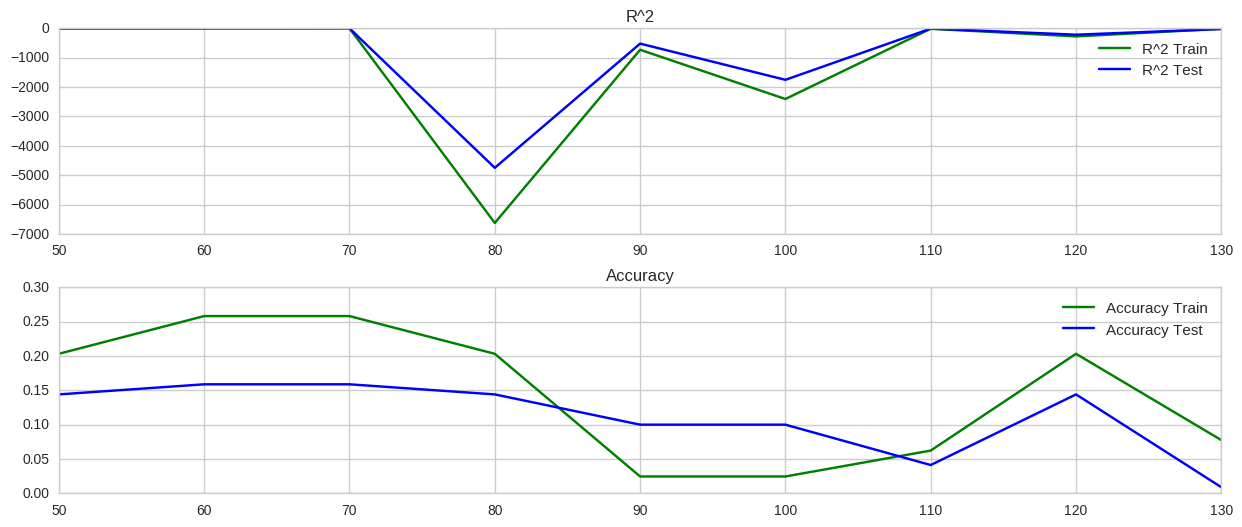

In [53]:
# get our x ticks
x = model_eval.index.tolist()[4:]

# setup figure
fig = plt.figure(figsize=(15, 6))
grid = plt.GridSpec(4, 4, hspace=0.7, wspace=0.2)

r_ax = fig.add_subplot(grid[0:2,:])
acc_ax = fig.add_subplot(grid[2:, :], sharex=None)


#Main Plot
r_ax.plot(x, model_eval["r_squared"][4:], '-g', label="R^2 Train")
r_ax.plot(x, model_eval["r_squared_test"][4:], '-b', label="R^2 Test")
acc_ax.plot(x, model_eval["accuracy"][4:], '-g', label="Accuracy Train")
acc_ax.plot(x, model_eval["accuracy_test"][4:], '-b', label="Accuracy Test")

r_ax.set_title("R^2")
acc_ax.set_title("Accuracy")

#setting legends
r_ax.legend(prop={'size':11})
acc_ax.legend(prop={'size':11})


plt.show()

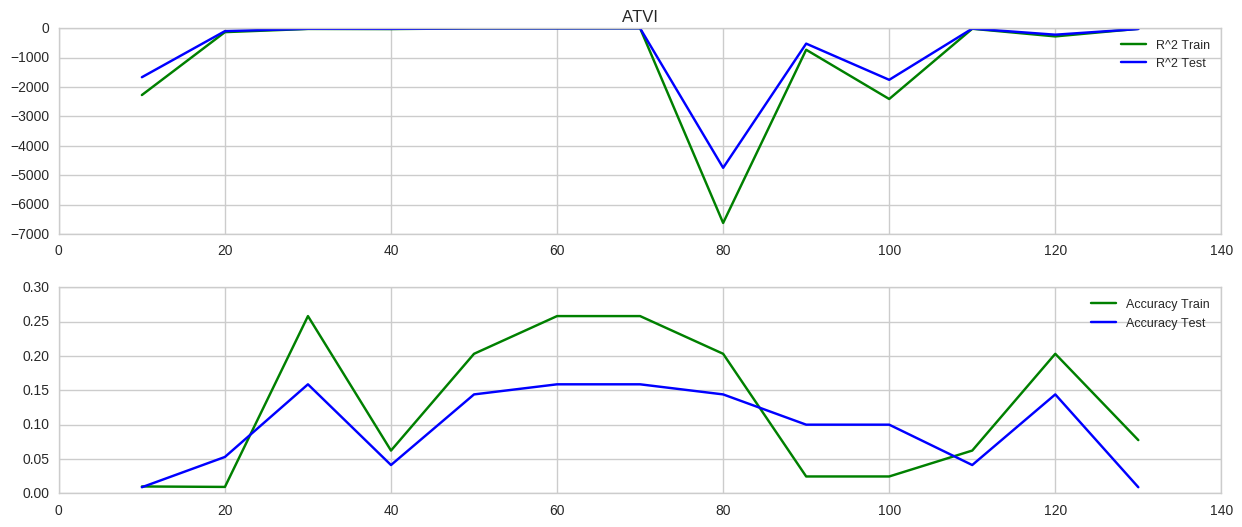

In [54]:
_slice = []

for key, group in trial.eval_status_df.groupby(level=(0)):
    if len(_slice) > 0:
        if not(key in _slice):
            continue
    
    

    # get our x ticks
    x = group.index.get_level_values(1)

    # setup figure
    fig = plt.figure(figsize=(15, 6))
    grid = plt.GridSpec(4, 4, hspace=0.7, wspace=0.2)

    r_ax = fig.add_subplot(grid[0:2,:])
    acc_ax = fig.add_subplot(grid[2:, :], sharex=None)
    
    r_ax.set_title(key)

    #Main Plot
    r_ax.plot(x, group["r_squared"], '-g', label="R^2 Train")
    r_ax.plot(x, group["r_squared_test"], '-b', label="R^2 Test")
    acc_ax.plot(x, group["accuracy"], '-g', label="Accuracy Train")
    acc_ax.plot(x, group["accuracy_test"], '-b', label="Accuracy Test")


    #setting legends
    r_ax.legend(prop={'size':9})
    acc_ax.legend(prop={'size':9})


    plt.show()

In [19]:
from sklearn.metrics import r2_score

In [46]:
y_pred = np.random.rand(3000, 4)
y_test = np.random.rand(3000, 4)

_r = [None] * 4
for i in range(4):
    _r[i] = r2_score(y_test[:,i], y_pred[:,i])

print("average {}".format(np.mean(_r)))
print("full {}".format(r2_score(y_test, y_pred)))


average -0.9506357442207816
full -0.9499023039909552


/home/pedro/anaconda3/lib/python3.5/site-packages/sklearn/metrics/regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


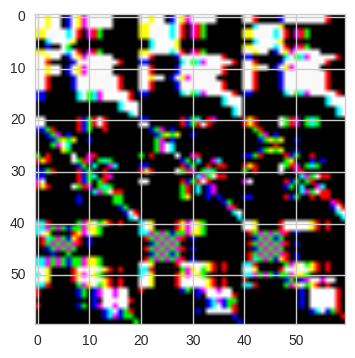

In [206]:
plt.imshow(scenarioc.load_scenarioc_encodings("GLW", trial.model_name, "2013-04-05"))